In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

In [3]:
(X_train,y_train),(X_test,y_test)= imdb.load_data(num_words=10000)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train=pad_sequences(X_train,maxlen=500)
test=pad_sequences(X_test,maxlen=500)

In [5]:
earlystop=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [7]:
model=Sequential()
model.add(Embedding(10000,128))
model.add(SimpleRNN(128,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history=model.fit(train,y_train,epochs=15,validation_split=0.2,batch_size=128,callbacks=[earlystop])

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.5033 - loss: 0.7154 - val_accuracy: 0.5994 - val_loss: 0.6566
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.6734 - loss: 0.6009 - val_accuracy: 0.8016 - val_loss: 0.4467
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.7778 - loss: 0.4782 - val_accuracy: 0.7312 - val_loss: 0.5234
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.8275 - loss: 0.3968 - val_accuracy: 0.7578 - val_loss: 0.4999
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.8094 - loss: 0.4342 - val_accuracy: 0.7698 - val_loss: 0.4875


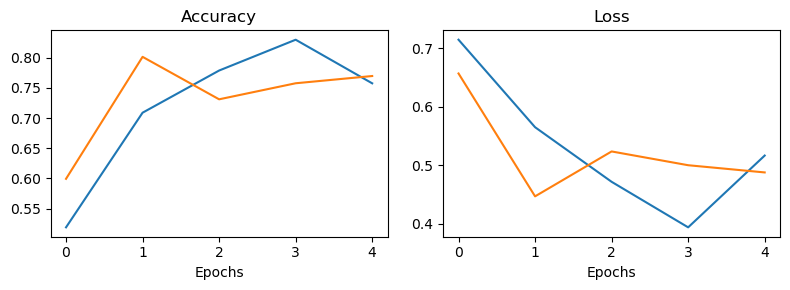

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
losses=pd.DataFrame(history.history)
plt.subplot(1,2,1)
plt.plot(losses[['accuracy','val_accuracy']])
plt.xlabel("Epochs")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(losses[['loss','val_loss']])
plt.xlabel("Epochs")
plt.title("Loss")
plt.tight_layout()
plt.show()


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
def predict_sentiment(text):
    # Load the IMDb word index dictionary
    word_index = imdb.get_word_index()
    
    # Tokenize the input text
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.word_index = word_index
    
    # Convert text to a sequence of word indices
    sequences = tokenizer.texts_to_sequences([text])
    
    # Pad the sequence to match the training data length (500)
    padded_sequence = pad_sequences(sequences, maxlen=500)
    
    # Predict sentiment (0 for negative, 1 for positive)
    prediction = model.predict(padded_sequence)
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    
    return sentiment

# Example usage
text = "The movie was fantastic! Really enjoyed it."
print("Sentiment:", predict_sentiment(text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sentiment: Positive


In [132]:
def decode_review(review): 
    word_index = imdb.get_word_index() 
    reverse_word_index = {value: key for key, value in word_index.items()} 
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review]) 
    return decoded_review 
sample_reviews = [ 
"This movie was fantastic! I loved it.", 
"It was bad and too long.", 
"An average film, nothing special.",
"The movie is worth watching",
] 
def preprocess_reviews(reviews): 
    encoded_reviews = [] 
    word_index = imdb.get_word_index() 
    for review in reviews: 
        encoded_review = [word_index.get(word.lower(), 0) + 3 for word in review.split()] 
        encoded_reviews.append(encoded_review) 
    return pad_sequences(encoded_reviews, maxlen=500) 

In [134]:
encoded_sample_reviews = preprocess_reviews(sample_reviews) 
predictions = model.predict(encoded_sample_reviews) 
predicted_classes = (predictions > 0.5).astype("int32") 
for review, prediction in zip(sample_reviews, predicted_classes): 
    sentiment = "Positive" if prediction[0] == 1 else "Negative" 
    print(f"Review: {review}\nSentiment: {sentiment}\n") 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Review: This movie was fantastic! I loved it.
Sentiment: Positive

Review: It was bad and too long.
Sentiment: Negative

Review: An average film, nothing special.
Sentiment: Negative

Review: The movie is worth watching
Sentiment: Positive



In [ ]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt 

max_features = 10000  
maxlen = 200 
batch_size = 32 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = sequence.pad_sequences(x_test, maxlen=maxlen) 
l 
model = Sequential() 
model.add(Embedding(max_features, 128)) 
model.add(SimpleRNN(128, activation='tanh'))  
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) 

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_split=0.2, callbacks=[early_stopping]) 

score, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size) 
print(f'Test score: {score:.4f}') 
print(f'Test accuracy: {accuracy:.4f}') 

plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Model Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Model Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.tight_layout() 
plt.show() 
 
def decode_review(review): 
    word_index = imdb.get_word_index() 
    reverse_word_index = {value: key for key, value in word_index.items()} 
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review]) 
    return decoded_review 

sample_reviews = [ 
"This movie was fantastic! I loved it.", 
"I didn't like this film at all. It was boring and too long.", 
"An average film, nothing special.", 
] 

def preprocess_reviews(reviews): 
    encoded_reviews = [] 
    word_index = imdb.get_word_index() 
    for review in reviews: 
    encoded_review = [word_index.get(word.lower(), 0) + 3 for word in review.split()] 
    encoded_reviews.append(encoded_review) 
    return sequence.pad_sequences(encoded_reviews, maxlen=maxlen) 

encoded_sample_reviews = preprocess_reviews(sample_reviews)  
predictions = model.predict(encoded_sample_reviews) 
predicted_classes = (predictions > 0.5).astype("int32")  # 1 for positive, 0 for negative 
 
for review, prediction in zip(sample_reviews, predicted_classes): 
    sentiment = "Positive" if prediction[0] == 1 else "Negative" 
    print(f"Review: {review}\nSentiment: {sentiment}\n")